In [1]:
import numpy as np
import pandas as pd
from typing import Union 
from typing import Optional
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.offline as pyo
from plotly.colors import n_colors
from enum import Enum


In [ ]:
color_pallet_blue = ['#2167AE', '#23366F', '#5495CF', '#91BFE3', '#1FB1E6']
color_pallet = ['#4870C6', '#77A984', '#19BAB6', '#A6E9AB',
                '#E1EE92', '#FFF773', '#FF7569', '#E18EbA', '#FFC5EA', '#6D6BCF']

In [ ]:
# Use a color palette defined by the user using the hex codes inside a dictionary

def plotly_colors(color_palette: dict, n_colors: int, title: str, orientation: str) -> go.Figure:
    """
    Function to create a plotly color palette using the hex codes defined by the user
    
    Arguments:
    color_palette : dict : dictionary containing the hex codes for the colors
    n_colors : int : number of colors to be displayed
    title : str : title of the plot
    orientation : str : orientation of the plot
    
    Returns:
    go.Figure : plotly figure with the color palette
    """
    fig = go.Figure()
    for i, color in enumerate(color_palette.values()):
        fig.add_trace(go.Scatter
                        (x=[i, i],
                         y=[0, 1],
                         mode="lines",
                         line=dict(color=color, width=30),
                         showlegend=False))
    fig.update_layout(title=title, xaxis=dict(showticklabels=False), yaxis=dict(showticklabels=False))
    fig.update_xaxes(range=[0, n_colors-1])
    fig.update_yaxes(range=[0, 1])
    fig.update_layout(width=1000, height=100, plot_bgcolor='white')




# Bar Charts

In [485]:
def plot_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'blues',
                   title: str = None, horizontal: bool = False, show_mean_median: bool = False,
                   show_number: bool = False, average_line: bool = False) -> go.Figure:
    """
     Generate a customizable bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bar chart.
        x_column (str): The column name for the x-axis of the chart.
        y_column (str): The column name for the y-axis of the chart.
        colormap (str, optional): The name of the colormap for bar colors. Default is 'blues'.
                                 Other examples: 'Blues', 'Mint', 'Viviridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        horizontal (bool, optional): If True, create a horizontal bar chart. Default is False (vertical bar chart).
        show_mean_median (bool, optional): Display mean and median values in the top-right corner of the chart.
                                           Default is False.
        show_number (bool, optional): Display values on top of each bar. Default is False.
        average_line (bool, optional): Add a dashed line representing the average value. Default is False.

    Returns:
        go.Figure: The configured bar chart as a Plotly Figure object.

    Note:
        This function creates a bar chart with customizable features including orientation,
        color scheme, annotations, average line, and more.
    """

    # Step 1: Sort the DataFrame by the y_column in descending order
    df = dataframe.sort_values(by=y_column, ascending=False)

    # Create the bar plot using plotly
    fig = go.Figure()

    if horizontal:
        fig.add_trace(go.Bar(y=df[x_column], x=df[y_column], orientation='h', marker=dict(color=df[y_column], colorscale=colormap)))
        fig.update_xaxes(title_text=y_column)
        fig.update_yaxes(title_text=x_column)
        # Invert y-axis for horizontal bar chart
        fig.update_layout(yaxis=dict(autorange="reversed"))
        # Display values at the top of each bar if show_number is True
        if show_number:
            for index, value in enumerate(df[y_column]):
                fig.add_annotation(
                    x=value,
                    y=df[x_column].iloc[index],
                    text=f'{value:.2f}',
                    showarrow=False,
                    xshift=20,
                    font=dict(size=12),
                )
        # Display mean and median values if show_mean_median is True
        if show_mean_median:
            # Calculating mean and median
            mean_value = df[y_column].mean()
            median_value = df[y_column].median()

            # Adding mean and median values in the top-right corner of the chart with a frame
            text_to_display = f'Mean: {mean_value:.2f}<br>Median: {median_value:.2f}'
            fig.add_annotation(
                x=0.99,
                y=0.01,
                xref='paper',
                yref='paper',
                text=text_to_display,
                showarrow=False,
                font=dict(size=12),
            )
        
                
    else:
        fig.add_trace(go.Bar(x=df[x_column], y=df[y_column], marker=dict(color=df[y_column], colorscale=colormap)))
        fig.update_xaxes(title_text=x_column)
        fig.update_yaxes(title_text=y_column)
        # Display values at the top of each bar if show_number is True
        if show_number:
            for index, value in enumerate(df[y_column]):
                fig.add_annotation(
                    x=df[x_column].iloc[index],
                    y=value,
                    text=f'{value:.2f}',
                    showarrow=False,
                    yshift=5,
                    font=dict(size=12),
                )

    # Display mean and median values if show_mean_median is True
    if horizontal==False:
        if show_mean_median:
            # Calculating mean and median
            mean_value = df[y_column].mean()
            median_value = df[y_column].median()

            # Adding mean and median values in the top-right corner of the chart with a frame
            text_to_display = f'Mean: {mean_value:.2f}<br>Median: {median_value:.2f}'
            fig.add_annotation(
                x=0.99,
                y=0.99,
                xref='paper',
                yref='paper',
                text=text_to_display,
                showarrow=False,
                font=dict(size=12),
            )

    # Display average line and difference annotations if average_line is True
    if average_line:
        average_value = df[y_column].mean()
        if horizontal:
            fig.add_shape(
                type='line',
                x0=average_value,
                x1=average_value,
                y0=-0.5,
                y1=len(df),
                line=dict(color='red', width=2, dash='dash')
            )
            for index, value in enumerate(df[y_column]):
                diff = value - average_value
                diff_text = f'Diff: {diff:.2f}'
                diff_color = 'red' if diff < 0 else ('black' if diff == 0 else 'green')
                fig.add_annotation(
                    x=value +.4,
                    y=df[x_column].iloc[index],
                    text=diff_text,
                    showarrow=False,
                    xshift=-40,
                    font=dict(size=10, color=diff_color),
                )
        else:
            fig.add_shape(
                type='line',
                x0=-0.5,
                x1=len(df),
                y0=average_value,
                y1=average_value,
                line=dict(color='red', width=2, dash='dash')
            )
            for index, value in enumerate(df[y_column]):
                diff = value - average_value
                diff_text = f'Diff: {diff:.2f}'
                diff_color = 'red' if diff < 0 else ('black' if diff == 0 else 'green')
                fig.add_annotation(
                    x=df[x_column].iloc[index],
                    y=value,
                    text=diff_text,
                    showarrow=False,
                    yshift=20,
                    font=dict(size=10, color=diff_color),
                )

    if title:
        fig.update_layout(title=dict(text=title, x=0.5, font=dict(size=18, color='#333333')))

    # Display the plot
    fig.update_layout(margin=dict(t=60, b=60, l=60, r=60))
    #fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

    #fig.write_html('interactive_chart.html')
    return fig
    
    


In [486]:
# Example usage
data = {'Category': ['A', 'B', 'G', 'D', 'E', 'F' ],
        'Value': [15, 25, 10, 20, 30, 40]}
df = pd.DataFrame(data)

plot_bar_chart(df, x_column='Category', y_column='Value', horizontal=True, show_mean_median=True, average_line=True, show_number=False, title='Suprise', colormap='blues')


# Combined two bar charts

In [480]:
def plot_double_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column_upper: str, y_column_lower: str, colormap: str = 'viridis',
                   title: str = None, show_number: bool = False, average_line: bool = False) -> go.Figure:
    """
    Generate a double bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the double bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column_upper (str): The name of the column to be used for the upper y-axis of the chart.
        y_column_lower (str): The name of the column to be used for the lower y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the bars. Default is 'viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        show_number (bool, optional): If True, the values of each bar will be displayed at the top of the bar.
                                      Default is False.
        average_line (bool, optional): If True, a horizontal dashed line will be added for the average value.
                                      Default is False.

    Returns:
        go.Figure: The function generates and displays the double bar chart using Plotly.
    """

    # Step 1: Sort the DataFrame by the y_column_upper in descending order
    df_upper = dataframe.sort_values(by=y_column_upper, ascending=False)
    
    # Step 2: Sort the DataFrame by the y_column_lower in descending order
    df_lower = dataframe.sort_values(by=y_column_lower, ascending=False)

    # Create subplots with two rows
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)

    # Add vertical bar chart to the upper subplot
    fig.add_trace(go.Bar(x=df_upper[x_column], y=df_upper[y_column_upper], marker=dict(color=df_upper[y_column_upper], colorscale=colormap)),
                  row=1, col=1)
    
    fig.update_yaxes(title_text=y_column_upper, row=1, col=1)
    # Display values at the top of each bar if show_number is True
    if show_number:
        for index, value in enumerate(df_upper[y_column_upper]):
            fig.add_annotation(
                x=df_upper[x_column].iloc[index],
                y=value,
                text=f'{value:.2f}',
                showarrow=False,
                yshift=5,
                font=dict(size=12),
                row=1, col=1,
            )

    # Add vertical bar chart to the lower subplot
    fig.add_trace(go.Bar(x=df_lower[x_column], y=df_lower[y_column_lower], marker=dict(color=df_lower[y_column_lower], colorscale=colormap)),
                  row=2, col=1)
    
    fig.update_yaxes(title_text=y_column_lower, row=2, col=1)
    # Display values at the top of each bar if show_number is True
    if show_number:
        for index, value in enumerate(df_lower[y_column_lower]):
            fig.add_annotation(
                x=df_lower[x_column].iloc[index],
                y=value,
                text=f'{value:.2f}',
                showarrow=False,
                yshift=5,
                font=dict(size=12),
                row=2, col=1,
            )

    if average_line:
        average_upper = df_upper[y_column_upper].mean()
        average_lower = df_lower[y_column_lower].mean()
        
        fig.add_shape(type='line', x0=-0.5, x1=len(df_upper), y0=average_upper, y1=average_upper,
                      line=dict(color='red', width=2, dash='dash'), row=1, col=1)
        
        fig.add_shape(type='line', x0=-0.5, x1=len(df_lower), y0=average_lower, y1=average_lower,
                      line=dict(color='red', width=2, dash='dash'), row=2, col=1)

    if title:
        fig.update_layout(title=dict(text=title, x=0.5, font=dict(size=18, color='#333333')))
 


    fig.update_layout(margin=dict(t=60, b=60, l=60, r=60))

    return fig


In [482]:
# Example usage
data = {'Category': ['A', 'B', 'C', 'D', 'E'],
        'Value_upper': [15, 25, 10, 20, 30],
        'Value_lower': [25, 35, 20, 30, 40]}
df = pd.DataFrame(data)

double_bar_chart = plot_double_bar_chart(df, x_column='Category', y_column_upper='Value_upper', y_column_lower='Value_lower', show_number=True, average_line=True, title= 'Number' )
double_bar_chart

# Grouped Bar chart

In [483]:
def plot_group_bar_chart(dataframe: pd.DataFrame, x_column: str, values_column: str, group_column: str,
                         title: str = None, colormap: str = 'viridis', horizontal: bool = False) -> None:
    """
    Generate a grouped bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the grouped bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        values_column (str): The name of the column to be used for the values of the grouped bars.
        group_column (str): The name of the column to be used for grouping the bars.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        horizontal (bool, optional): If True, the chart will be displayed as a horizontal grouped bar chart.
                                     If False, the chart will be displayed as a vertical grouped bar chart (default).

    Returns:
        None: The function displays the grouped bar chart directly without returning anything.
    """

    data_to_plot = dataframe.pivot(index=group_column, columns=x_column, values=values_column)

    # Create the grouped bar chart using Plotly
    fig = go.Figure()

    for col in data_to_plot.columns:
        if horizontal:
            fig.add_trace(go.Bar(y=data_to_plot.index, x=data_to_plot[col], name=col, orientation='h',
                                 marker=dict(colorscale=colormap)))
        else:
            fig.add_trace(go.Bar(x=data_to_plot.index, y=data_to_plot[col], name=col,
                                 marker=dict(colorscale=colormap)))

    # Set axis labels and title
    fig.update_layout(title_text=title, xaxis_title=group_column, yaxis_title=values_column)

    # Show legend
    fig.update_layout(showlegend=True)

    # Display the plot
    fig.show()


In [484]:
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales': [100, 150, 80, 120, 120, 50, 70, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a vertical stacked bar chart
plot_group_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product', horizontal=False,
                       title='Grouped Bar Chart Example')

# Stacked Bar chart

In [487]:
def plot_stacked_bar_chart(dataframe: pd.DataFrame, x_column: str, values_column: str, group_column: str,
                           title: str = None, colormap: str = 'viridis', horizontal: bool = False) -> None:
    """
    Generate a stacked bar chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the stacked bar chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        values_column (str): The name of the column to be used for the values of the stacked bars.
        group_column (str): The name of the column to be used for grouping the stacked bars.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.
        horizontal (bool, optional): If True, the chart will be displayed as a horizontal stacked bar chart.
                                     If False, the chart will be displayed as a vertical stacked bar chart (default).

    Returns:
        None: The function displays the stacked bar chart directly without returning anything.
    """

    data_to_plot = dataframe.pivot(index=x_column, columns=group_column, values=values_column)

    # Create the stacked bar chart using Plotly
    fig = go.Figure()

    for col in data_to_plot.columns:
        if horizontal:
            fig.add_trace(go.Bar(y=data_to_plot.index, x=data_to_plot[col], name=col, orientation='h',
                                 marker=dict(colorscale=colormap)))
        else:
            fig.add_trace(go.Bar(x=data_to_plot.index, y=data_to_plot[col], name=col,
                                 marker=dict(colorscale=colormap)))

    # Set axis labels and title
    fig.update_layout(title_text=title, xaxis_title=x_column, yaxis_title=values_column)

    # Set barmode to 'stack' to stack the bars vertically
    fig.update_layout(barmode='stack')

    # Show legend
    fig.update_layout(showlegend=True)

    # Display the plot
    fig.show()

In [488]:
# Example usage
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales': [100, 150, 80, 120, 120, 50, 70, 90, 100]
}

df = pd.DataFrame(data)
plot_stacked_bar_chart(dataframe=df, x_column='Region', values_column='Sales', group_column='Product',
                       title='Stacked Bar Chart Example', horizontal=True)

# Combined two stacked bar chart

In [489]:
def plot_double_stacked_bar_chart(dataframe: pd.DataFrame, x_column: str, y_column_upper: str, y_column_lower: str, group_column: str,
                                  title: str = None, colormap: str = 'viridis') -> None:
    """
    Generate two individual stacked bar charts using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the stacked bar charts.
        x_column (str): The name of the column to be used for the x-axis of the charts.
        y_column_upper (str): The name of the column to be used for the upper y-axis of the charts.
        y_column_lower (str): The name of the column to be used for the lower y-axis of the charts.
        group_column (str): The name of the column to be used for grouping the stacked bars.
        title (str, optional): The title for the charts. If None, the charts will have no title.
        colormap (str, optional): The name of the colormap to use for coloring the bars.
                                  Default is 'viridis'.

    Returns:
        None: The function displays the stacked bar charts directly without returning anything.
    """

    data_to_plot_upper = dataframe.pivot(index=x_column, columns=group_column, values=y_column_upper)
    data_to_plot_lower = dataframe.pivot(index=x_column, columns=group_column, values=y_column_lower)

    # Create subplots with two rows and one column
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

    for i, data_to_plot in enumerate([data_to_plot_upper, data_to_plot_lower]):
        for col in data_to_plot.columns:
            fig.add_trace(go.Bar(x=data_to_plot.index, y=data_to_plot[col], name=col, marker=dict(colorscale=colormap)),
                          row=i + 1, col=1)

    # Set axis labels and title
    fig.update_layout(title_text=title, xaxis_title=x_column)
    fig.update_yaxes(title_text=y_column_upper, row=1, col=1)
    fig.update_yaxes(title_text=y_column_lower, row=2, col=1)

    # Set barmode to 'stack' to stack the bars vertically
    fig.update_layout(barmode='stack')

    # Show legend
    fig.update_layout(showlegend=True)

    # Display the plot
    fig.show()


In [490]:
# Example usage
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'C'],
    'Sales_upper': [100, 150, 80, 120, 120, 50, 70, 90, 100],
    'Sales_lower': [50, 80, 40, 70, 60, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

plot_double_stacked_bar_chart(dataframe=df, x_column='Region', y_column_upper='Sales_upper', y_column_lower='Sales_lower',
                              group_column='Product', title='Double Stacked Bar Chart Example')


# Percentage Column Chart

In [491]:
def create_stacked_percentage_bar_plot(data: pd.DataFrame, date_column: str, group_column: str, values_column: str, title: str):
    # Calculate the percentage for each group for each date
    data['%'] = 100 * data[values_column] / data.groupby(date_column)[values_column].transform('sum')

    # Create the stacked bar plot using Plotly Express
    fig = px.bar(data, x=date_column, y="%", color=group_column, title=title, template="plotly_white")
    fig.update_layout(barmode="stack")
    fig.update_layout(plot_bgcolor='white')
    fig.update_yaxes(showline=False, showgrid=False)
    fig.update_xaxes(showline=False, showgrid=False, tickvals=data[date_column].unique())
    fig.show()



In [492]:
from datetime import datetime, timedelta

# Create example data
date_list = [datetime(2022, 1, 1) + timedelta(days=i) for i in range(5)]
group_list = ['Group A', 'Group B', 'Group C', 'Group D']
data = []

for date in date_list:
    for group in group_list:
        value = random.randint(50, 100)
        data.append({'date': date, 'group': group, 'values': value})

data = pd.DataFrame(data)



# Generate and display the stacked percentage bar plot using the function
create_stacked_percentage_bar_plot(data, date_column, group_column, values_column, title)

# Line Chart

In [493]:
def plot_line_chart(dataframe: pd.DataFrame, x_column: str, y_columns: list, colormap: str = 'tab20',
                    title: str = None, xlabel: str = None, ylabel: str = None) -> None:
    """
    Generate a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_columns (list): The names of the columns to be used for the y-axis of the chart (multiple lines).
        colormap (str, optional): The name of the colormap to use for coloring the lines.
                                  Default is 'tab20'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """

    # Create the line chart using Plotly
    fig = go.Figure()

    # Add each line to the figure
    for column in y_columns:
        fig.add_trace(go.Scatter(x=dataframe[x_column], y=dataframe[column], mode='lines+markers', name=column))

    # Update layout for axis labels and title
    if xlabel:
        fig.update_xaxes(title_text=xlabel)
    if ylabel:
        fig.update_yaxes(title_text=ylabel)
    if title:
        fig.update_layout(title_text=title)

      # Set barmode to 'stack' to stack the bars vertically
   # fig.update_layout(barmode='stack')

    # Display the plot
    fig.show()


In [494]:
# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100]
}

df = pd.DataFrame(data)

# Using the function to create a line chart with multiple lines
plot_line_chart(dataframe=df, x_column='Year', y_columns=['ProductA', 'ProductB', 'ProductC'],
                title='Line Chart Example', xlabel='Year', ylabel='Sales')


In [495]:
def plot_category_line_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, category_column: str,
                             title: str = None, xlabel: str = None, ylabel: str = None, marker: bool = False):
    """
    Create a line chart with multiple lines using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the line chart.
        x_column (str): The name of the column to be used for the x-axis of the chart (dates).
        y_column (str): The name of the column to be used for the y-axis of the chart (numerical values).
        category_column (str): The name of the column used for grouping and creating individual lines.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, no label will be displayed.
        ylabel (str, optional): The label for the y-axis. If None, no label will be displayed.
        marker (bool, optional): If True, data points will be marked. If False, data points will not be marked.
                                Default is False.

    Returns:
        None: The function displays the line chart directly without returning anything.
    """
    # Get unique categories and generate colors dynamically
    unique_categories = dataframe[category_column].unique()
    num_categories = len(unique_categories)
    colors = px.colors.qualitative.Set1[:num_categories]

    fig = px.line(dataframe, x=x_column, y=y_column, color=category_column, title=title,
                  labels={x_column: xlabel, y_column: ylabel}, color_discrete_sequence=colors)

    # Add markers if the "marker" parameter is True
    if marker:
        fig.update_traces(mode='markers+lines')
    
    fig.show()



In [496]:
# Example usage
data = {
    'Date': ['2023-01-02', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-05', '2023-01-03'],
    'Value': [10, 15, 8, 12, 18, 10, 12],
    'Category': ['A', 'B', 'A', 'B', 'A', 'C', 'C']
}

df = pd.DataFrame(data)

plot_category_line_chart(dataframe=df, x_column='Date', y_column='Value', category_column='Category',
                         title='Line Chart Example', xlabel='Date', ylabel='Value', marker=True)


# Combined bar and line chart in one chart

In [617]:
import plotly.graph_objects as go
import pandas as pd

def plot_combined_bar_line_chart(dataframe: pd.DataFrame, x_column: str, y_column_bar: str, y_column_line: str,
                                 bar_color: str = 'blue', line_color: str = 'red', title: str = None,
                                 yaxis1_title: str = None, yaxis2_title: str = None):
    """
    Generate a combined bar and line chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column_bar (str): The name of the column to be used for the bar chart y-axis.
        y_column_line (str): The name of the column to be used for the line chart y-axis.
        bar_color (str, optional): The color of the bars in the bar chart. Default is 'blue'.
        line_color (str, optional): The color of the line in the line chart. Default is 'red'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        yaxis1_title (str, optional): The title for the primary y-axis. If None, no title will be shown.
        yaxis2_title (str, optional): The title for the secondary y-axis. If None, no title will be shown.

    Returns:
        None: The function displays the combined bar and line chart directly without returning anything.
    """

    fig = go.Figure()

    # Adding the bar chart
    fig.add_trace(go.Bar(x=dataframe[x_column], y=dataframe[y_column_bar], name=y_column_bar, marker_color=bar_color))

    # Adding the line chart with a secondary y-axis
    fig.add_trace(go.Scatter(x=dataframe[x_column], y=dataframe[y_column_line], name=y_column_line, yaxis='y2', line=dict(color=line_color)))

    # Set up the layout with two y-axes
    fig.update_layout(
        title=title,
        xaxis=dict(title=x_column),
        yaxis=dict(title=yaxis1_title, titlefont=dict(color=bar_color), title_standoff=10),
        yaxis2=dict(title=yaxis2_title, titlefont=dict(color=line_color), title_standoff=10, overlaying='y', side='right'),
        legend=dict(x=1.05, y=1.05),
        barmode='overlay'
    )

    # Show the plot
    fig.show()

# Example usage
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Sales': [150, 200, 180, 220, 250],
    'Profit': [15, 20, 18, 25, 28]
}

df = pd.DataFrame(data)

plot_combined_bar_line_chart(df, x_column='Month', y_column_bar='Sales', y_column_line='Profit',
                             bar_color='teal', line_color='mediumblue', title='Sales and Profit',
                             yaxis1_title='Sales', yaxis2_title='Profit')


# Scatter Plot

In [499]:
def plot_scatter_plot(dataframe: pd.DataFrame, x_column: str, y_column: str, colormap: str = 'Viridis',
                      title: str = None, xlabel: str = None, ylabel: str = None, color_column: str = None) -> None:
    """
    Generate a scatter plot using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the scatter plot.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        colormap (str, optional): The name of the colormap to use for coloring the data points.
                                  Default is 'Viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        color_column (str, optional): The name of the column to be used for coloring the data points based on
                                      distinct values in this column.

    Returns:
        None: The function displays the scatter plot directly without returning anything.
    """

    # Create the scatter plot using Plotly Express
    fig = px.scatter(dataframe, x=x_column, y=y_column, color=color_column, color_continuous_scale=colormap,
                     labels={x_column: xlabel, y_column: ylabel}, title=title)

    # Customize legend title
    if color_column:
        fig.update_layout(legend_title_text='Categories')

    # Display the plot
    fig.show()


In [500]:
# Example DataFrame
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015],
    'ProductA': [100, 120, 140, 110, 130, 150],
    'ProductB': [80, 90, 95, 85, 100, 110],
    'ProductC': [70, 80, 85, 75, 90, 100],
    'Category': ['Category1', 'Category1', 'Category2', 'Category2', 'Category3', 'Category3']
}

df = pd.DataFrame(data)

# Using the function to create a scatter plot
plot_scatter_plot(dataframe=df, x_column='Year', y_column='ProductA', colormap='Viridis',
                  title='Scatter Plot Example', xlabel='Year', ylabel='Sales', color_column='Category')


# Bubble Chart

In [501]:
def plot_bubble_chart(dataframe: pd.DataFrame, x_column: str, y_column: str, size_column: str,
                      colormap: str = 'Viridis', title: str = None, xlabel: str = None, ylabel: str = None,
                      color_column: str = None, column_info: str = None, average_line: bool = False,
                      average_color: bool = False):
    """
    Create a bubble chart using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the bubble chart.
        x_column (str): The name of the column to be used for the x-axis of the chart.
        y_column (str): The name of the column to be used for the y-axis of the chart.
        size_column (str): The name of the column to be used for the size of the bubbles.
        colormap (str, optional): The name of the colormap to use for coloring the bubbles. Default is 'Viridis'.
        title (str, optional): The title for the chart. If None, the chart will have no title.
        xlabel (str, optional): The label for the x-axis. If None, no label will be displayed.
        ylabel (str, optional): The label for the y-axis. If None, no label will be displayed.
        color_column (str, optional): The name of the column to be used for coloring the bubbles by category.
                                     If None, no color differentiation will be applied.
        column_info (str, optional): The name of the column to be used for displaying additional information
                                    inside the bubbles. If None, no information will be displayed.
        average_line (bool, optional): If True, a black dashed line will be added to indicate the average of y values.
                                      If False, the line will not be added. Default is False.
        average_color (bool, optional): If True, bubbles with below average size will be surrounded by a thick red line,
                                       and bubbles with above average size will be surrounded by a thick green line.
                                       If False, no coloring around the bubbles will be applied. Default is False.

    Returns:
        None: The function displays the bubble chart directly without returning anything.
    """
    if colormap == 'Viridis':
        colormap_sequence = px.colors.sequential.Viridis
    else:
        colormap_sequence = px.colors.qualitative[colormap]

    fig = px.scatter(dataframe, x=x_column, y=y_column, size=size_column, color=color_column,
                     color_discrete_sequence=colormap_sequence, labels={x_column: xlabel, y_column: ylabel},
                     hover_name=column_info, custom_data=[size_column])

    if average_line:
        avg_y = dataframe[y_column].mean()
        avg_line = go.layout.Shape(type='line', x0=min(dataframe[x_column])-0.5, x1=max(dataframe[x_column])+0.5,
                                   y0=avg_y, y1=avg_y, line=dict(color='black', dash='dash'))
        fig.add_shape(avg_line)

    if average_color:
        avg_size = dataframe[size_column].mean()
        for trace in fig.data:
            if trace.customdata[0] < avg_size:
                trace.marker.line.width = 2
                trace.marker.line.color = 'red'
            else:
                trace.marker.line.width = 2
                trace.marker.line.color = 'green'

    fig.show()


# Heat Map

In [502]:
def plot_heatmap(dataframe: pd.DataFrame, x_column: str, y_column: str, values_column: str, colormap: str = 'Viridis',
                 title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a heatmap using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the heatmap.
        x_column (str): The name of the column to be used for the x-axis of the heatmap.
        y_column (str): The name of the column to be used for the y-axis of the heatmap.
        values_column (str): The name of the column to be used for the values of the heatmap cells.
        colormap (str, optional): The name of the colormap to use for coloring the heatmap cells.
                                  Default is 'Viridis'.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the heatmap directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the heatmap
    pivot_df = dataframe.pivot(index=y_column, columns=x_column, values=values_column)

    # Create the heatmap using Plotly
    fig = go.Figure(data=go.Heatmap(z=pivot_df.values, x=pivot_df.columns, y=pivot_df.index,
                                    colorscale=colormap, zmin=pivot_df.min().min(), zmax=pivot_df.max().max()))

    # Adding labels and title
    if xlabel:
        fig.update_xaxes(title_text=xlabel)
    if ylabel:
        fig.update_yaxes(title_text=ylabel)
    if title:
        fig.update_layout(title_text=title)

    # Display the plot
    fig.show()


In [503]:
# Example DataFrame
data = {
    'X': [1, 1, 2, 2, 3, 3],
    'Y': [5, 6, 5, 6, 5, 6],
    'Values': [30, 40, 50, 60, 70, 80]
}

df = pd.DataFrame(data)

# Using the function to create a heatmap
plot_heatmap(dataframe=df, x_column='X', y_column='Y', values_column='Values', title='Heatmap Example',
             xlabel='X-axis', ylabel='Y-axis')


In [504]:
def plot_heatmap(dataframe: pd.DataFrame, x_column: str, y_column: str, values_column: str, colormap: str = 'Viridis',
                 title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a heatmap using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the heatmap.
        x_column (str): The name of the column to be used for the x-axis of the heatmap.
        y_column (str): The name of the column to be used for the y-axis of the heatmap.
        values_column (str): The name of the column to be used for the values of the heatmap cells.
        colormap (str, optional): The name of the colormap to use for coloring the heatmap cells.
                                  Default is 'Viridis'.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the heatmap directly without returning anything.
    """

    # Pivot the DataFrame to get the data in a suitable format for the heatmap
    pivot_df = dataframe.pivot(index=y_column, columns=x_column, values=values_column)

    # Create the heatmap using Plotly
    fig = go.Figure(data=go.Heatmap(z=pivot_df.values, x=pivot_df.columns, y=pivot_df.index,
                                    colorscale=colormap, zmin=pivot_df.min().min(), zmax=pivot_df.max().max()))

    # Adding labels and title
    if xlabel:
        fig.update_xaxes(title_text=xlabel, showgrid=False, showline=True, linewidth=2, linecolor='black')
    if ylabel:
        fig.update_yaxes(title_text=ylabel, showgrid=False, showline=True, linewidth=2, linecolor='black')
    if title:
        fig.update_layout(title_text=title, title_font=dict(size=24, family='Arial', color='darkblue'))

    # Customize the colorbar
    fig.update_layout(coloraxis_colorbar=dict(title='Values', thickness=25, len=0.4, x=0.98, y=0.5,
                                              ticks='outside', ticklen=10, tickcolor='white', tickfont=dict(size=14)))

    # Update font and color for axis titles
    fig.update_xaxes(title_font=dict(size=18, family='Arial', color='black'))
    fig.update_yaxes(title_font=dict(size=18, family='Arial', color='black'))

    # Update colorbar title font and color
    fig.update_layout(coloraxis_colorbar_title_font=dict(size=18, family='Arial', color='black'))

    # Display the plot
    fig.show()

# Example DataFrame
data = {
    'X': [1, 1, 2, 2, 3, 3],
    'Y': [5, 6, 5, 6, 5, 6],
    'Values': [30, 40, 50, 60, 70, 80]
}

df = pd.DataFrame(data)

# Using the function to create a heatmap
plot_heatmap(dataframe=df, x_column='X', y_column='Y', values_column='Values', title='Heatmap Example',
             xlabel='X-axis', ylabel='Y-axis')


# Correlation Heatmap

In [574]:
def plot_correlation_heatmap(dataframe: pd.DataFrame, colormap: str = 'RdBu', title: str = None):
    """
    Generate a correlation heatmap using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the correlation heatmap.
        colormap (str, optional): The name of the colorscale to use for coloring the heatmap cells.
                                  Default is 'RdBu'.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.

    Returns:
        None: The function displays the correlation heatmap directly without returning anything.
    """

    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create the heatmap using Plotly
    fig = go.Figure(data=go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.index,
                                    colorscale=colormap, zmin=-1, zmax=1, reversescale=True))

    # Adding labels and title
    fig.update_layout(
        title=title,
        xaxis=dict(tickfont=dict(size=12), tickangle=-45),
        yaxis=dict(tickfont=dict(size=12)),
        coloraxis_colorbar=dict(title='Correlation', titlefont=dict(size=14), ticks='inside')
    )

    # Display the plot
    fig.show()



In [575]:

# Generate a sample DataFrame with random data
np.random.seed(42)
data = {
    'Feature1': np.random.rand(200),
    'Feature2': np.random.rand(200),
    'Feature3': np.random.rand(200),
    'Feature4': np.random.rand(200),
    'Feature5': np.random.rand(200)
}

df = pd.DataFrame(data)

plot_correlation_heatmap(df, colormap='RdBu', title='Correlation Heatmap Example')

# Now you can use this df with the plot_correlation_heatmap function


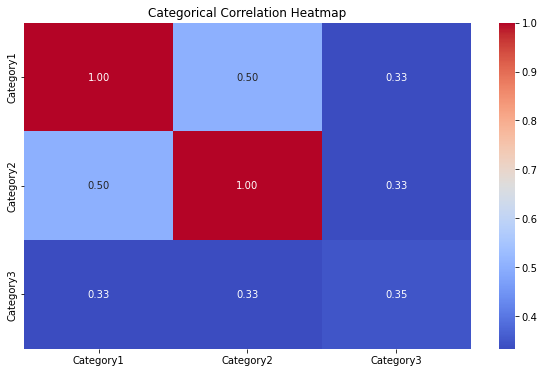

In [576]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def plot_categorical_heatmap(dataframe: pd.DataFrame, title: str = None):
    """
    Generate a correlation heatmap for categorical values using Cramér's V statistic.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the categorical data.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.

    Returns:
        None: The function displays the categorical heatmap directly without returning anything.
    """
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)
    
    for x in categorical_columns:
        for y in categorical_columns:
            corr_matrix.loc[x, y] = cramers_v(dataframe[x], dataframe[y])

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

# Sample DataFrame with categorical data
data = {
    'Category1': ['A', 'B', 'A', 'B', 'C'],
    'Category2': ['X', 'Y', 'X', 'Z', 'Z'],
    'Category3': ['L', 'M', 'L', 'L', 'M']
}

df = pd.DataFrame(data)

# Call the function with the sample DataFrame
plot_categorical_heatmap(df, title='Categorical Correlation Heatmap')


In [577]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from itertools import combinations
from sklearn.preprocessing import LabelEncoder

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def plot_categorical_heatmap_plotly(dataframe: pd.DataFrame, title: str = None):
    """
    Generate a correlation heatmap for categorical values using Cramér's V statistic.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the categorical data.
        title (str, optional): The title for the heatmap. If None, the heatmap will have no title.

    Returns:
        None: The function displays the categorical heatmap directly without returning anything.
    """
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)
    
    for x in categorical_columns:
        for y in categorical_columns:
            corr_matrix.loc[x, y] = cramers_v(dataframe[x], dataframe[y])

    fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                     x=corr_matrix.columns,
                                     y=corr_matrix.index,
                                     colorscale='Viridis',
                                     zmin=0,
                                     zmax=1))
    
    fig.update_layout(title=title)
    fig.show()

# Sample DataFrame with categorical data
data = {
    'Category1': ['A', 'B', 'A', 'B', 'C'],
    'Category2': ['X', 'Y', 'X', 'Z', 'Z'],
    'Category3': ['L', 'M', 'L', 'L', 'M']
}

df = pd.DataFrame(data)

# Call the function with the sample DataFrame
plot_categorical_heatmap_plotly(df, title='Categorical Correlation Heatmap')


In [582]:
np.random.seed(42)
num_data_points = 1000
num_categories = 100

categories = [f'Category{i}' for i in range(1, num_categories+1)]

data = {
    f'Category{i}': np.random.choice(categories, size=num_data_points) for i in range(1, 4)
}

df = pd.DataFrame(data)

plot_categorical_heatmap_plotly(df, title='Categorical Correlation Heatmap')

# Histogram

In [571]:
def plot_histogram(dataframe: pd.DataFrame, column: str, bins: int = 10,
                   colormap: str = 'Viridis', title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a histogram using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the histogram.
        column (str): The name of the column to be used for the histogram.
        bins (int, optional): The number of bins to use for the histogram. Default is 10.
        colormap (str, optional): The name of the colorscale to use for coloring the bars.
                                  Default is 'Viridis'.
        title (str, optional): The title for the histogram. If None, the histogram will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the histogram directly without returning anything.
    """

    # Create the histogram using Plotly
    fig = go.Figure()

    fig.add_trace(go.Histogram(x=dataframe[column], nbinsx=bins, marker_colorscale=colormap))

    # Adding labels and title
    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        xaxis=dict(title_font=dict(size=14)),
        yaxis=dict(title_font=dict(size=14))
    )

    # Display the plot
    fig.show()


In [572]:
# Example DataFrame
data = {
    'Values': [10, 20, 30, 40, 50, 30, 25, 15, 20, 35]
}

df = pd.DataFrame(data)

# Using the function to create a histogram
plot_histogram(dataframe=df, column='Values', bins=5, colormap='Viridis', title='Histogram Example',
               xlabel='Values', ylabel='Frequency')

# Stacked Histogram

In [549]:
def plot_stacked_histogram(dataframe: pd.DataFrame, x_column: str, color_column: str,
                           bins: int = 10, title: str = None, xlabel: str = None, ylabel: str = None):
    """
    Generate a stacked histogram using the provided DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data for the histogram.
        x_column (str): The name of the column to be used for the x-axis of the histogram.
        color_column (str): The name of the column to be used for coloring the bars and creating the stacks.
        bins (int, optional): The number of bins to use for the histogram. Default is 10.
        title (str, optional): The title for the histogram. If None, the histogram will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.

    Returns:
        None: The function displays the stacked histogram directly without returning anything.
    """

    # Create the stacked histogram using Plotly Express
    fig = px.histogram(dataframe, x=x_column, color=color_column, nbins=bins)

    # Customize the layout
    if title:
        fig.update_layout(title_text=title, title_font=dict(size=16, color='#333333'))

    if xlabel:
        fig.update_xaxes(title_text=xlabel, title_font=dict(size=14, color='#333333'))

    if ylabel:
        fig.update_yaxes(title_text=ylabel, title_font=dict(size=14, color='#333333'))

    # Show the plot
    return fig


In [553]:
# Create a sample DataFrame with 250 data points
np.random.seed(42)  # For reproducibility
data = {
    'Value': np.random.randint(1, 100, size=250),  # Generating random values between 1 and 100
    'Category': np.random.choice(['A', 'B', 'C', 'D'], size=250)  # Generating random category labels
}

df = pd.DataFrame(data)

plot_stacked_histogram(df, 'Category', 'Value', bins= 100)


# Boxplot

In [291]:
def plot_box_plot(dataframe: pd.DataFrame, x_column: str, y_column: str,
                  title: str = None, xlabel: str = None, ylabel: str = None, 
                  point: str = None):
    """
    Generate a box plot using the provided DataFrame.

    Parameters:
    ----------
        dataframe (pd.DataFrame): The DataFrame containing the data for the box plot.
        x_column (str): The name of the column to be used for the x-axis of the box plot.
        y_column (str): The name of the column to be used for the y-axis of the box plot.
        title (str, optional): The title for the box plot. If None, the box plot will have no title.
        xlabel (str, optional): The label for the x-axis. If None, the x-axis will have no label.
        ylabel (str, optional): The label for the y-axis. If None, the y-axis will have no label.
        point (str, optional): The points of the DataFrame. If all, then points are visible.  
    Returns:
    -------
        None: The function displays the box plot directly without returning anything.
    """

    # Create the box plot using Plotly Express
    fig = px.box(dataframe, x=x_column, y=y_column, points=point)

    # Customize the layout
    if title:
        fig.update_layout(title_text=title, title_font=dict(size=16, color='#333333'))

    if xlabel:
        fig.update_xaxes(title_text=xlabel, title_font=dict(size=14, color='#333333'))

    if ylabel:
        fig.update_yaxes(title_text=ylabel, title_font=dict(size=14, color='#333333'))

    # Show the plot
    fig.show()


In [292]:
# Example DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'C', 'C', 'B', 'C', 'A'],
    'Values': [10, 20, 30, 40, 50, 30, 25, 15, 20, 35]
}

df = pd.DataFrame(data)

# Using the function to create a box plot
plot_box_plot(dataframe=df, x_column='Category', y_column='Values', title='Box Plot Example',
              xlabel='Category', ylabel='Values', point='all')


# Rainbow Boxplot

In [554]:
def rainbow_boxplot(data: pd.DataFrame, group_column: str, value_column: str, x_label: str, y_label: str, title: str):
    """
    Generate a rainbow boxplot with numerical groups and corresponding y-axis values.

    Parameters:
    -----------
        data (pd.DataFrame): The input data containing the columns for grouping and values.
        group_column (str): The name of the column representing the groups.
        value_column (str): The name of the column containing the y-axis values.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.

    Returns:
    -------
        fig: A Plotly figure object containing the rainbow boxplot.
    """
    # Order the data based on the group_column
    ordered_data = data.sort_values(by=group_column)

    # Create the boxplot traces
    boxplot_traces = []
    colors = ["#9400D3", "#4B0082", "#0000FF", "#00FF00", "#FFFF00", "#FF7F00", "#FF0000"]
    
    unique_groups = ordered_data[group_column].unique()
    for i, group in enumerate(unique_groups):
        group_data = ordered_data[ordered_data[group_column] == group][value_column]
        boxplot_trace = go.Box(
            y=group_data,
            name=str(group),
            marker_color=colors[i % len(colors)]
        )
        boxplot_traces.append(boxplot_trace)

    # Create the layout
    layout = go.Layout(
        title=title,
        xaxis=dict(title=x_label),
        yaxis=dict(title=y_label),
        boxmode='overlay'  # Reducing distance between groups
    )

    # Create the figure
    fig = go.Figure(data=boxplot_traces, layout=layout)
    return fig




In [555]:
# Example data
np.random.seed(1)
num_rows = 250
data = pd.DataFrame({
    "Age": np.random.randint(20, 60, num_rows),
    "Gross_Hourly_Pay": np.random.normal(30, 10, num_rows)
})

# Parameters
group_column = "Age"
value_column = "Gross_Hourly_Pay"
x_label = "Age"
y_label = "Gross Hourly Pay"
title = "Rainbow Boxplot Example"

# Generate and display the rainbow boxplot using the function
rainbow_boxplot_fig = rainbow_boxplot(data, group_column, value_column, x_label, y_label, title)
rainbow_boxplot_fig.show()

# Treemap

In [540]:
def plot_treemap(dataframe: pd.DataFrame, path_column: str, values_column: str,
                 title: str = None, color_column: str = None):
    """
    Generate a treemap using the provided DataFrame.

    Parameters:
    ---------
        dataframe (pd.DataFrame): The DataFrame containing the data for the treemap.
        path_column (str): The name of the column to be used for the hierarchy in the treemap.
        values_column (str): The name of the column to be used for the values in the treemap.
        title (str, optional): The title for the treemap. If None, the treemap will have no title.
        color_column (str, optional): The name of the column to be used for coloring the treemap cells.
                                      If None, the treemap cells will have the same color.

    Returns:
    -------
        None: The function displays the treemap directly without returning anything.
    """

    # Create the treemap using Plotly Express
    fig = px.treemap(dataframe, path=[path_column], values=values_column, color=color_column,
                     color_continuous_scale='Blues', hover_data=[values_column])

    # Customize the layout
    if title:
        fig.update_layout(title_text=title, title_font=dict(size=16, color='#333333'))

    # Show the plot
    fig.show()


In [6]:
# Example DataFrame
data = {
    'Category': ['A', 'A', 'B', 'B', 'A', 'C', 'C', 'B', 'C', 'A'],
    'Values': [10, 20, 30, 40, 50, 30, 25, 15, 20, 35]
}

df = pd.DataFrame(data)

# Using the function to create a treemap
plot_treemap(dataframe=df, path_column='Category', values_column='Values', title='Treemap Example',
             color_column='Values')


 # Tables

In [538]:
from typing import Optional, List

def create_interactive_table(dataframe: pd.DataFrame, title: str = 'Interactive Tables', columns: Optional[List[str]] = None) -> None:
    """
    Creates an interactive Plotly table from a Pandas DataFrame.

    Parameters:
    ----------
        dataframe (pd.DataFrame): The Pandas DataFrame containing the data.
        title (str, optional): Title of the table. Defaults to 'Interactive Tables'.
        columns (List[str], optional): List of column names to display in the table. Defaults to None (all columns).

    Returns:
    -------
        a Table
    """
    if columns is None:
        columns = dataframe.columns
    
    header = columns
    data = dataframe[columns].values.T.tolist()  # Transpose the data to match columns

    fig = go.Figure(data=[go.Table(header=dict(values=header),
                     cells=dict(values=data))])

    fig.update_layout(title=title, width=600, height=400)

    return fig


In [534]:
data = [ 
    ['Alice', 28, 'USA'],
    ['Bob', 35, 'Canada'],
    ['Charlie', 22, 'UK'],
    ['David', 19, 'Australia']
]
data =pd.DataFrame(data)

In [535]:
create_interactive_table(data)

# Ridgeline plot

In [87]:
def plot_ridgeline_plot(data: pd.DataFrame, group_column: str, values_column: str, title="Ridgeline Plot", colortype='rgb'):
    """
    Generate a ridgeline plot with varying mean and standard deviation.

    Parameters:
    -----------
        data (pd.DataFrame): The input data containing the columns for grouping and values.
        group_column (str): The name of the column representing the groups.
        values_column (str): The name of the column representing the values.
        title (str, optional): The title of the plot (default is "Ridgeline Plot").
        colortype (str): Type of color scale for the violin plots (default is 'rgb').

    Returns:
    -------
        fig: A Plotly figure object containing the ridgeline plots.
    """
    np.random.seed(1)

    unique_groups = data[group_column].unique()
    num_sets = len(unique_groups)

    # Generate data with varying mean and standard deviation
    data_sets = []
    for i, group in enumerate(unique_groups):
        group_data = data[data[group_column] == group][values_column]
        data_sets.append(group_data)

    colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', num_sets, colortype=colortype)

    fig = go.Figure()
    for group_name, data_set, color in zip(unique_groups, data_sets, colors):
        fig.add_trace(go.Violin(x=data_set, line_color=color, name=group_name))

    fig.update_traces(orientation='h', side='positive', width=2, points=False)
    fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False, title=title)

    return fig


In [88]:
# Create an array of fruit types
fruits = ['Apple', 'Banana', 'Orange']

# Generate random prices for the fruits
prices = np.random.uniform(0.5, 3.5, 20)

# Create an array of imaginary store names
stores = ['Store A', 'Store B', 'Store C', 'Store D', 'Store E']

# Randomly assign a store to each row
store_assignments = np.random.choice(stores, 20)

# Randomly assign a fruit to each row
fruit_assignments = np.random.choice(fruits, 20)

# Create the DataFrame
data = {'Fruit': fruit_assignments, 'Price': prices, 'Store': store_assignments}
df = pd.DataFrame(data)
ridgeline_plot = plot_ridgeline_plot(df, group_column="Fruit", values_column="Price")
ridgeline_plot.show()


# Violin Plot

In [77]:
def plot_violin_plot(data: pd.DataFrame, group_column: str, value_column: str, title="Violin Plot", points='all'):
    """
    Plots a Violin Plot.

    This function creates a Violin Plot, which is a statistical visualization that combines aspects of a box plot and a kernel density plot.
    It shows the distribution of a continuous variable across different groups.

    Parameters:
    ----------
        data (pd.DataFrame): The input pandas DataFrame containing the data.
        group_column (str): The name of the column representing the distinct x-axis groups.
        value_column (str): The name of the column representing the y-values for group_column.
        title (str, optional): The title of the plot (default is "Violin Plot").
        points (str or bool, optional): Determines which data points are shown on the plot.
            Can be one of ['all', 'outliers', 'suspectedoutliers', False].
            'all': Show all data points.
            'outliers': Show only the outliers.
            'suspectedoutliers': Show only the suspected outliers.
            False: Do not show any data points. (default is 'all')

    Return:
    --------
        fig: A Plotly figure object containing the generated Violin Plot.

    Example:
    -------
        # Example data
        data_url = "https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv"
        data = pd.read_csv(data_url)

        # Parameters
        group_column = 'day'
        value_column = 'total_bill'
        title = "Violin Plot Example"
        show_points = 'all'  # 'all', 'outliers', 'suspectedoutliers', or False

        # Generate the Violin plot using the function
        violin_plot = generate_violin_plot(data, group_column, value_column, title, show_points)
        violin_plot.show()
    """
    fig = go.Figure()

    unique_groups = pd.unique(data[group_column])

    for group in unique_groups:
        fig.add_trace(go.Violin(
            x=data[group_column][data[group_column] == group],
            y=data[value_column][data[group_column] == group],
            name=group,
            box_visible=True,
            meanline_visible=True,
            points=points
        ))

    fig.update_layout(title_text=title)
    return fig


In [78]:
# Generate and display the Violin plot using the function
plot_violin_plot(df, 'Fruit', 'Price', 'Nice job')


# Scatter Matrix

In [531]:
def plot_scatterplot_matrix(data: pd.DataFrame, dimensions: list, title: str = "Scatterplot Matrix"):
    """
    Create a scatterplot matrix (splom) using Plotly's go.Splom.

    Parameters:
    -----------
    data (pd.DataFrame): The input data containing the dimensions for the scatterplot matrix.
    dimensions (list): List of columns from the dataframe to be used as dimensions.
    title (str, optional): The title for the scatterplot matrix. Default is "Scatterplot Matrix".

    Returns:
    -------
    None: Displays the scatterplot matrix plot.
    """
    fig = go.Figure(data=go.Splom(
                    dimensions=[dict(label=col, values=data[col]) for col in dimensions],
                    showupperhalf=False,  # remove plots on diagonal
                    marker=dict(color=data.index,
                                showscale=False,  # colors encode categorical variables
                                line_color='white', line_width=0.5)
                    ))

    fig.update_layout(
        title=title,
        width=1000,
        height=800,
    )

    return fig



In [532]:

# Create a sample dataframe
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Feature4': np.random.rand(100)
})
dimensions = [ 'Feature1','Feature2' ]

plot_scatterplot_matrix(data, dimensions)

In [49]:
def generate_html_with_charts(chart_list, filename='charts.html'):
    """
    Generate an HTML file containing Plotly charts.

    Parameters:
        chart_list (list): List of Plotly chart variables.
        filename (str, optional): Name of the HTML file to be generated. Defaults to 'charts.html'.

    Returns:
        None
    """
    # Create an empty div to hold the charts
    div_content = ''

    # Iterate through the chart_list and generate HTML for each chart
    for chart in chart_list:
        div_content += pyo.plot(chart, output_type='div')

    # Create the full HTML content
    html_content = f'''
    <!DOCTYPE html>
    <html>
    <head>
        <title>Charts</title>
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    </head>
    <body>
        {div_content}
    </body>
    </html>
    '''

    # Write the HTML content to the file
    with open(filename, 'w') as f:
        f.write(html_content)

